In [2]:
import pandas as pd
import numpy as np
import prophet
from make_series import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


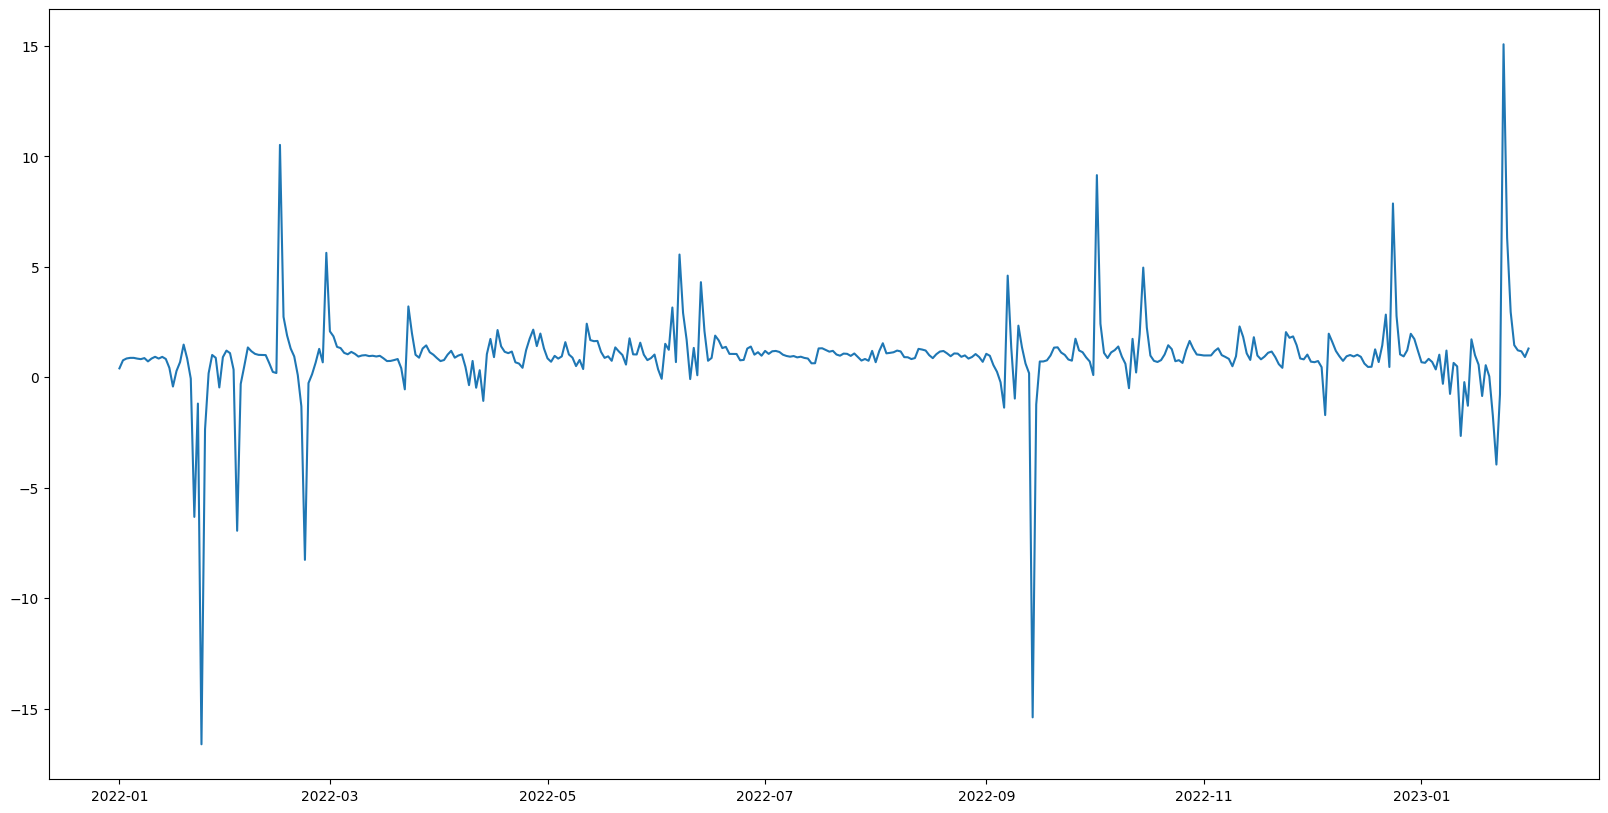

In [3]:
# Соберем нужные данные
df = pd.read_excel('data/normalized_data.xlsx')
series = make_series(df, df['category'].unique().tolist(), is_exponential_smoothing=True)
series_diff = [0.4]
for i in range(1, len(series)):
    series_diff.append(series[i] / series[i-1])

series_diff = exponential_smoothing(series_diff, 0.8)
dates = get_all_dates()

# Сделаем из 2 столбцов датафрейм
df = pd.DataFrame({'ds': dates, 'y': series_diff})


df['ds'] = pd.to_datetime(df['ds'])

# Сделаем график series
plt.figure(figsize=(20, 10))
plt.plot(df['ds'], df['y'])
plt.show()

# разделим на обучающую и тестовую выборку
predictions = 100
train_df = df[:-predictions]
test_df = df[-predictions:]

In [4]:
# Проверим на стационарность
test_stationarity(series_diff)
# p-value << 0.05 => ряд стационарен

Results of Dickey-Fuller Test:
Test Statistic                -1.536218e+01
p-value                        3.600331e-28
#Lags Used                     0.000000e+00
Number of Observations Used    3.950000e+02
Critical Value (1%)           -3.447014e+00
Critical Value (5%)           -2.868885e+00
Critical Value (10%)          -2.570683e+00
dtype: float64


In [5]:
# Создадим модель
model = prophet.Prophet()
model.fit(train_df)

12:13:28 - cmdstanpy - INFO - Chain [1] start processing
12:13:29 - cmdstanpy - INFO - Chain [1] done processing
